**cosine-similarity**

In [ ]:
pip install numpy


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
# consider two vectors A and B in 2-D
A=np.array([7,3])
B=np.array([3,7])

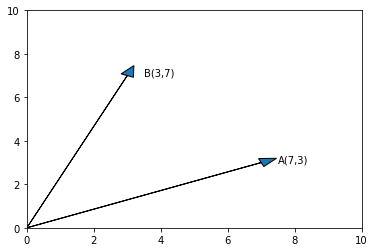

In [ ]:
ax = plt.axes()
ax.arrow(0.0, 0.0, A[0], A[1], head_width=0.4, head_length=0.5)
plt.annotate(f"A({A[0]},{A[1]})", xy=(A[0], A[1]),xytext=(A[0]+0.5, A[1]))
ax.arrow(0.0, 0.0, B[0], B[1], head_width=0.4, head_length=0.5)
plt.annotate(f"B({B[0]},{B[1]})", xy=(B[0], B[1]),xytext=(B[0]+0.5, B[1]))
plt.xlim(0,10)
plt.ylim(0,10)
plt.show()
plt.close()
# cosine similarity between A and B

cos_sim=np.dot(A,B)/(np.linalg.norm(A)*np.linalg.norm(B))


In [ ]:
print (f"Cosine Similarity between A and B:{cos_sim}")


Cosine Similarity between A and B:0.7241379310344827


In [ ]:
DQ="البرمجة بلغة بايثون"
DA="تستخدم البرمجة بلغة بايثون في معالجة اللغات الطبيعية" 
DB="مقدمة في استخدام بايثون"

In [ ]:
documents = [DQ,DA,DB]

In [ ]:
# Scikit Learn
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Create the Document Term Matrix

count_vectorizer = CountVectorizer()
sparse_matrix = count_vectorizer.fit_transform(documents)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix = sparse_matrix.todense()
df = pd.DataFrame(doc_term_matrix, 
                  columns=count_vectorizer.get_feature_names(), 
                  index=['DQ', 'DA', 'DB'])
df



,استخدام,البرمجة,الطبيعية,اللغات,بايثون,بلغة,تستخدم,في,معالجة,مقدمة
DQ,0,1,0,0,1,1,0,0,0,0
DA,0,1,1,1,1,1,1,1,1,0
DB,1,0,0,0,1,0,0,1,0,1


In [ ]:
# Compute Cosine Similarity
import pprint
from sklearn.metrics.pairwise import cosine_similarity
pprint.pprint(cosine_similarity(sparse_matrix))

array([[1.        , 0.61237244, 0.28867513],
       [0.61237244, 1.        , 0.35355339],
       [0.28867513, 0.35355339, 1.        ]])


**inverted-index**

In [ ]:
import nltk

In [ ]:
%%writefile Data.txt
We propose a matching algorithm 
the data for the retrieval process
Java programming language

Writing Data.txt


In [ ]:
file = open('/content/Data.txt', encoding='utf8')
read = file.read()
file.seek(0)
read
line = 1
for word in read:
    if word == '\n':
        line += 1
print("Number of lines in file is: ", line)
array = []
for i in range(line):
    array.append(file.readline())
  
array

Number of lines in file is:  3


['We propose a matching algorithm \n',
 'the data for the retrieval process\n',
 'Java programming language']

In [ ]:
from nltk.tokenize import word_tokenize

In [ ]:
import nltk
nltk.download('punkt')
for i in range(1):
    # this will convert
    # the word into tokens
    text_tokens = word_tokenize(read)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
tokens_without_sw = [
    word for word in text_tokens if not word in stopwords.words()]
print(tokens_without_sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['We', 'propose', 'matching', 'algorithm', 'data', 'retrieval', 'process', 'Java', 'programming', 'language']


In [ ]:
dict = {}
  
for i in range(line):
    check = array[i].lower()
    for item in tokens_without_sw:
  
        if item in check:
            if item not in dict:
                dict[item] = []
  
            if item in dict:
                dict[item].append(i+1)
  
dict

{'algorithm': [1],
 'data': [2],
 'language': [3],
 'matching': [1],
 'process': [2],
 'programming': [3],
 'propose': [1],
 'retrieval': [2]}